# THE SPARKS FOUNDATION

### GRIP : DATA SCIENCE & BUSINESS ANALYTICS INTERN - August 2021

### Submitted by : Sally Correia

### TASK-1 :    Prediction Using Supervised ML       

### Problem Statement : Predict the percentage of a student based on number of study hours using Supervised Machine Learning.

In [12]:
# Importing all libraries required in this notebook
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

**Reading data from URL**

In [13]:
data=pd.read_csv("http://bit.ly/w-data")

**Understanding data**

In [14]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [16]:
data.shape

(25, 2)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Descriptive Statistics**

In [18]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Checking Missing Values**

In [19]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

- **There are no missing values in Hours and Scores cloumns.**

**Checking for Outliers**

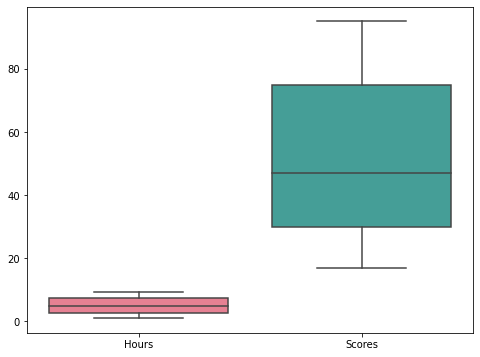

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,palette='husl')
plt.show()

- **There are no outliers in Hours and Scores columns.**

**Scatterplot**

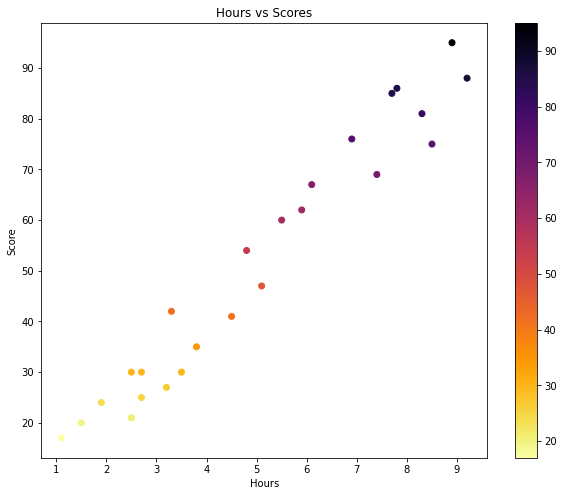

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(x=data['Hours'],y=data['Scores'],c=data['Scores'],cmap='inferno_r')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.colorbar()
plt.show()

- **The plot shows positive linear relationship between study Hours and test Scores.**

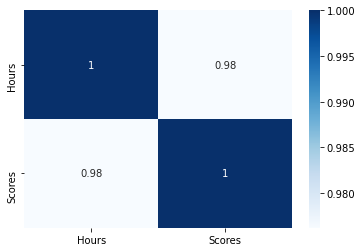

In [22]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

- **The above heatmap shows that there is a strong postive correlation between study Hours and test Scores.**

**Train & Test**

In [15]:
X=data.drop('Scores',axis=1)  # Target variable
y=data['Scores']   # Feature varibale

In [16]:
# Splitting data into train (80%) & test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

**Model Fitting**

In [35]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train) #fitting the model
print("Training Complete!")

Training Complete!


**Linear Regression**

In [38]:
lr_coeff=np.round(lin_reg.coef_[0],2)
print(lr_coeff)
lr_intercepts=np.round(lin_reg.intercept_,2)
print(lr_intercepts)
print('Scores=',lr_coeff, '* Hours +',lr_intercepts)

9.94
1.51
Scores= 9.94 * Hours + 1.51


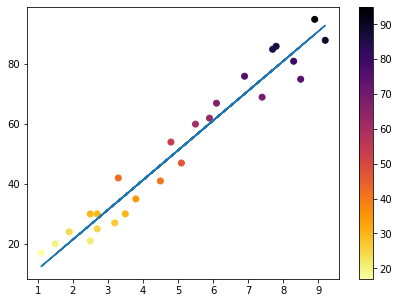

In [39]:
# Plotting regression line
regressor_line=lin_reg.coef_*X+lin_reg.intercept_
plt.figure(figsize=(7,5))
plt.scatter(X,y,c=y,cmap='inferno_r')
plt.plot(X,regressor_line)
plt.colorbar()
plt.show()

**Predictions**

In [40]:
y_pred=lin_reg.predict(X_test) #Predicting scores on test data

In [41]:
# Actual vs Predicted
a=pd.DataFrame({'Actual Scores':y_test,'Predicted Scores':y_pred})
a

,Actual Scores,Predicted Scores
14,17,12.442587
0,21,26.359448
17,24,20.395079
6,88,92.961570
23,76,70.098155


**Predicted score if a student studies for 9.25 hrs/ day**

In [49]:
hours=input('Enter no. of hours spent per day : ')
hours=float(hours)
pred=lin_reg.predict([[hours]])[0]
print('Predicted score if a student studies for', f'{hours} hrs/day is',round(pred,2),'%')

Enter no. of hours spent per day : 9.25
Predicted score if a student studies for 9.25 hrs/day is 93.46 %


**Evaluating the model**

In [56]:
mean_err=metrics.mean_absolute_error(y_test,y_pred)
print('Mean absolute error = ',round(mean_err,2))
mean_sq_err=metrics.mean_squared_error(y_test,y_pred)
print('Mean squared error = ',round(mean_sq_err,2))
root_mean_sq_err=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Root Mean squared error = ',round(root_mean_sq_err,2))
r2_score=metrics.r2_score(y_test,y_pred)
print('R2 Score = ',round(r2_score,2))

Mean absolute error =  4.88
Mean squared error =  24.39
Root Mean squared error =  4.94
R2 Score =  0.97
